# Heart Disease Classification Model

## Package Imports

In [229]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    cross_val_predict,
    cross_val_score,
    RandomizedSearchCV,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Dataset Import

### Variables

- age: Age in Years
- sex: Gender (0 = Female, 1 Male)
- cp: Chest Pain Type (0 = Asymptomatic, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Typical Angina)
- trestbps: Resting Blood Pressure in mm/hg
- chol: Serum Cholesterol in mg/dl
- fps: Fasting Blood Sugar above 120 mg/dl (0 = No, 1 = Yes)
- restecg: Resting Electrocardiogram (0 = Probable Left Ventricular Hypertrophy by Estes’ Criteria, 1 = Normal, 2 = ST-T Wave Abnormality)
- thalach: Maximum Heart Rate
- exang: Exercise-induced Angina (0 = No, 1 = Yes)
- oldpeak: ST Depression induced by Exercise relative to Rest
- slope: Slope of the peak exercise ST segment: (0 = Downsloping; 1 = Flat; 2 = Upsloping)
- ca: Number of Major Vessels (0–3)
- thal: Thalassemia Trait (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect)
- target: Heart Disease (0 = No Disease, 1 = Disease)


In [230]:
df = pd.read_csv("./data/heart-disease-dataset.csv").sample(frac=1)

## Dataset Exploration

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 96 to 44
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [232]:
df.describe().applymap("{:,.3f}".format)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


<Axes: xlabel='Gender'>

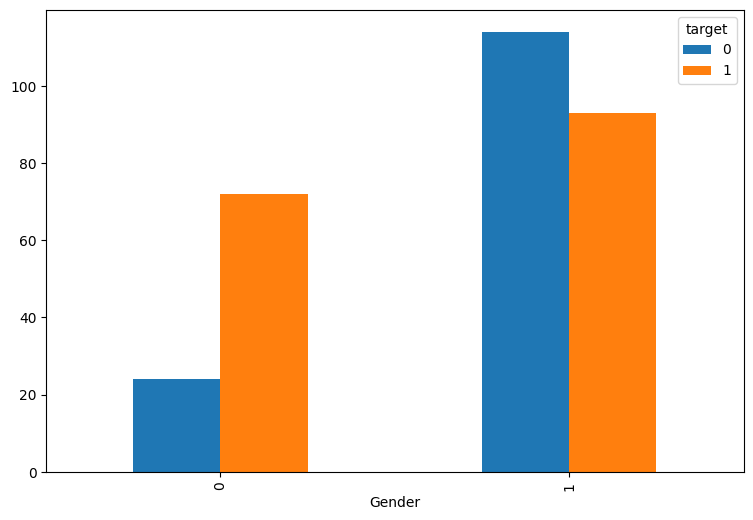

In [233]:
pd.crosstab(df["sex"], df["target"]).plot(kind="bar", xlabel="Gender", figsize=(9, 6))

<Axes: xlabel='Chest Pain Level'>

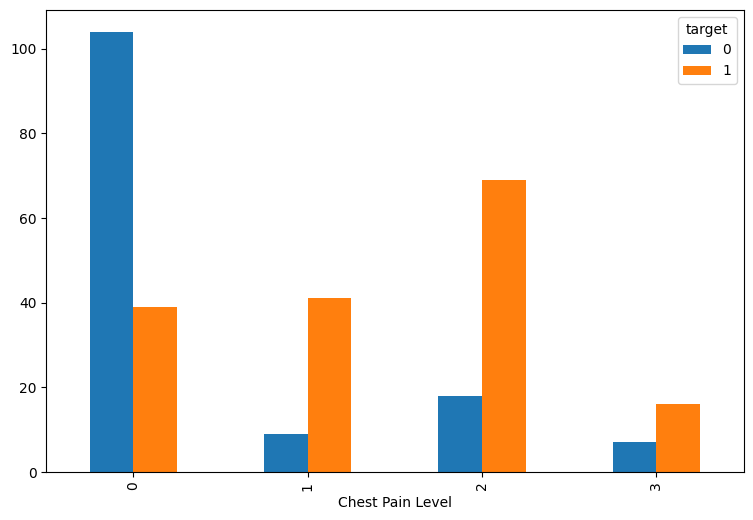

In [234]:
pd.crosstab(df["cp"], df["target"]).plot(
    kind="bar",
    xlabel="Chest Pain Level",
    figsize=(9, 6),
)

## Correlation Analysis

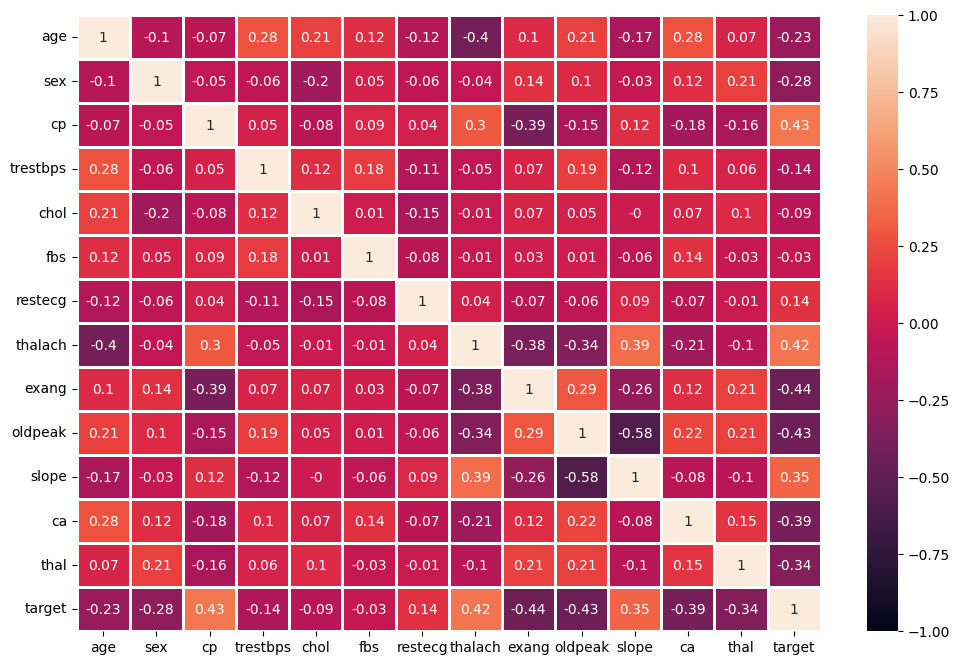

In [235]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, linewidths=1)

## Dataset Split

In [236]:
X = df.drop("target", axis=1)
y = df["target"]

## Model Selection

In [237]:
def find_best_estimator(n_loops: int = 10):
    estimator_options = ("logistic", "k_neighbors", "random_forest")

    i = 0

    avg_scores = {
        "logistic": 0,
        "k_neighbors": 0,
        "random_forest": 0,
    }

    while i < n_loops:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        models = {
            "logistic": LogisticRegression(),
            "k_neighbors": KNeighborsClassifier(),
            "random_forest": RandomForestClassifier(),
        }

        scores = {}

        for option in estimator_options:
            model = models[option]
            model.fit(X_train, y_train)
            scores[option] = model.score(X_test, y_test)
            avg_scores[option] = avg_scores[option] * (i / (i + 1)) + scores[option] * (
                1 / (i + 1)
            )

        i += 1

    for option in estimator_options:
        print(f"{option}: {avg_scores[option]}")


find_best_estimator(50)

c:\Users\danie\_data\courses\machine-learning-and-data-science\10-classification-milestone-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\danie\_data\courses\machine-learning-and-data-science\10-classification-milestone-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

logistic: 0.8393442622950819
k_neighbors: 0.6422950819672126
random_forest: 0.8232786885245902


## Model Tuning

In [238]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [239]:
model_random_forest = RandomizedSearchCV(
    Pipeline(
        [
            ("estimator", RandomForestClassifier()),
        ]
    ),
    {
        "estimator__max_features": ["sqrt", "log2", None],
        "estimator__min_samples_leaf": [1, 4, 16, 64, 256],
        "estimator__n_estimators": [4, 16, 64, 256, 1024],
    },
    cv=5,
    n_iter=32,
    verbose=1,
)

model_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('estimator',
                                              RandomForestClassifier())]),
                   n_iter=32,
                   param_distributions={'estimator__max_features': ['sqrt',
                                                                    'log2',
                                                                    None],
                                        'estimator__min_samples_leaf': [1, 4,
                                                                        16, 64,
                                                                        256],
                                        'estimator__n_estimators': [4, 16, 64,
                                                                    256,
                                                                    1024]},
                   verbose=1)

In [240]:
model_logistic = RandomizedSearchCV(
    Pipeline(
        [
            ("estimator", LogisticRegression()),
        ]
    ),
    {
        "estimator__penalty": ["l1", "l2", "elasticnet"],
        "estimator__C": [0.25, 1, 4, 16, 64],
        "estimator__solver": [
            "lbfgs",
            "liblinear",
            "newton-cg",
            "newton-cholesky",
            "sag",
            "saga",
        ],
    },
    cv=5,
    n_iter=32,
    verbose=1,
)

model_logistic.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\danie\_data\courses\machine-learning-and-data-science\10-classification-milestone-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\danie\_data\courses\machine-learning-and-data-science\10-classification-milestone-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('estimator',
                                              LogisticRegression())]),
                   n_iter=32,
                   param_distributions={'estimator__C': [0.25, 1, 4, 16, 64],
                                        'estimator__penalty': ['l1', 'l2',
                                                               'elasticnet'],
                                        'estimator__solver': ['lbfgs',
                                                              'liblinear',
                                                              'newton-cg',
                                                              'newton-cholesky',
                                                              'sag', 'saga']},
                   verbose=1)

## Model Evaluation

------------------------------
RANDOM FOREST MODEL (CROSS-VALIDATED)
------------------------------
Accuracy: 0.8353
Precision: 0.8167
Recall: 0.8848
F1 Score: 0.817
ROC Score: 0.902

------------------------------
LOGISTIC REGRESSION MODEL (CROSS-VALIDATED)
------------------------------
Accuracy: 0.8252
Precision: 0.805
Recall: 0.903
F1 Score: 0.8223
ROC Score: 0.9016

------------------------------
RANDOM FOREST MODEL (SINGLE-VALIDATED)
------------------------------
Accuracy: 0.8525
Precision: 0.8286
Recall: 0.9062
F1 Score: 0.8657
ROC Score: 0.93


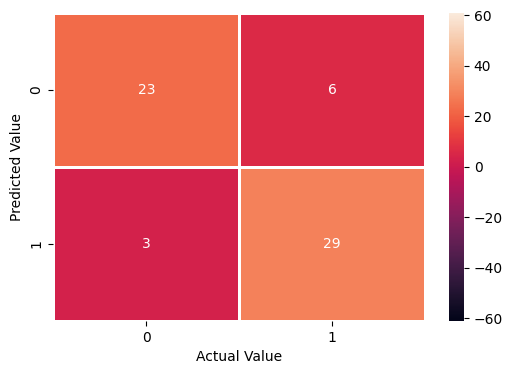

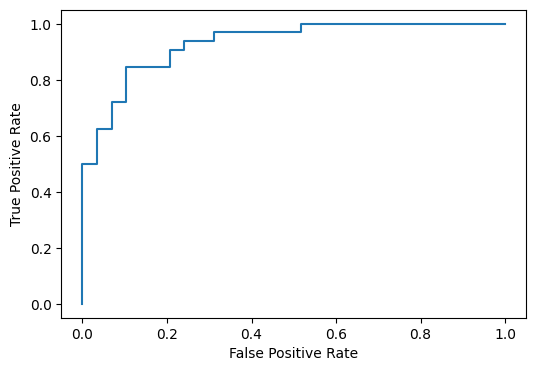


------------------------------
LOGISTIC REGRESSION MODEL (SINGLE-VALIDATED)
------------------------------
Accuracy: 0.8197
Precision: 0.7692
Recall: 0.9375
F1 Score: 0.8451
ROC Score: 0.9278


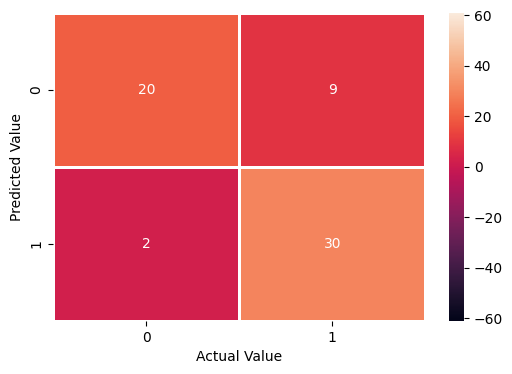

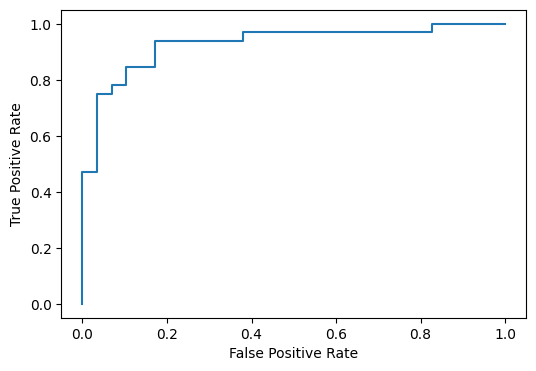

In [241]:
def evaluate_model_cross_validation(model_name: str, model, X, y):
    model_scores = {
        "accuracy": cross_val_score(model, X, y, cv=5, scoring="accuracy").mean(),
        "precision": cross_val_score(model, X, y, cv=5, scoring="precision").mean(),
        "recall": cross_val_score(model, X, y, cv=5, scoring="recall").mean(),
        "f1": cross_val_score(model, X, y, cv=5, scoring="f1_weighted").mean(),
        "roc": cross_val_score(model, X, y, cv=5, scoring="roc_auc").mean(),
    }

    print("------------------------------")
    print(f"{model_name} (Cross-validated)".upper())
    print("------------------------------")
    print(f"Accuracy: {model_scores['accuracy'].round(4)}")
    print(f"Precision: {model_scores['precision'].round(4)}")
    print(f"Recall: {model_scores['recall'].round(4)}")
    print(f"F1 Score: {model_scores['f1'].round(4)}")
    print(f"ROC Score: {model_scores['roc'].round(4)}")

    print("")


def evaluate_model_single_validation(model_name: str, model, X_test, y_test):
    n_test = len(y_test)

    y_predict = model.predict(X_test)
    y_predict_proba = model.predict_proba(X_test)
    y_predict_proba_positive = y_predict_proba[:, 1]

    model_scores = {
        "accuracy": accuracy_score(y_test, y_predict),
        "precision": precision_score(y_test, y_predict),
        "recall": recall_score(y_test, y_predict),
        "f1": f1_score(y_test, y_predict),
        "roc": roc_auc_score(y_test, y_predict_proba_positive),
    }

    print("------------------------------")
    print(f"{model_name} (Single-validated)".upper())
    print("------------------------------")
    print(f"Accuracy: {model_scores['accuracy'].round(4)}")
    print(f"Precision: {model_scores['precision'].round(4)}")
    print(f"Recall: {model_scores['recall'].round(4)}")
    print(f"F1 Score: {model_scores['f1'].round(4)}")
    print(f"ROC Score: {model_scores['roc'].round(4)}")

    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4)
    ax = sns.heatmap(
        confusion_matrix(y_test, y_predict),
        annot=True,
        vmin=-n_test,
        vmax=n_test,
        linewidths=1,
    )
    ax.set_xlabel("Actual Value")
    ax.set_ylabel("Predicted Value")
    plt.show()

    fp_rate, tp_rate, thresholds = roc_curve(y_test, y_predict_proba_positive)
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4)
    ax.plot(fp_rate, tp_rate)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    plt.show()

    print("")


evaluate_model_cross_validation(
    "Random Forest Model",
    model_random_forest.best_estimator_,
    X,
    y,
)
evaluate_model_cross_validation(
    "Logistic Regression Model",
    model_logistic.best_estimator_,
    X,
    y,
)

evaluate_model_single_validation(
    "Random Forest Model",
    model_random_forest.best_estimator_,
    X_test,
    y_test,
)
evaluate_model_single_validation(
    "Logistic Regression Model",
    model_logistic.best_estimator_,
    X_test,
    y_test,
)